In [41]:
import os
os.chdir('/content/drive/MyDrive/Deep learning/self_driveing_car')

In [42]:
#!git clone 'https://github.com/rslim087a/track'

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import ntpath
import pandas as pd

In [44]:
cols = ['center','left','right','steering','throttle','reverse','speed']
df = pd.read_csv('track/driving_log.csv',names=cols)
df

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.615438
...,...,...,...,...,...,...,...
4048,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,26.017680
4049,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,25.808640
4050,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,25.652960
4051,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,25.446850


In [45]:
def rel_path(path):
  head,tail=ntpath.split(path)
  return tail

In [46]:
df['center']=df['center'].apply(rel_path)
df['left']=df['left'].apply(rel_path)
df['right']=df['right'].apply(rel_path)

In [47]:
df

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438
...,...,...,...,...,...,...,...
4048,center_2018_07_16_17_16_31_474.jpg,left_2018_07_16_17_16_31_474.jpg,right_2018_07_16_17_16_31_474.jpg,0.0,0.0,0.0,26.017680
4049,center_2018_07_16_17_16_31_544.jpg,left_2018_07_16_17_16_31_544.jpg,right_2018_07_16_17_16_31_544.jpg,0.0,0.0,0.0,25.808640
4050,center_2018_07_16_17_16_31_617.jpg,left_2018_07_16_17_16_31_617.jpg,right_2018_07_16_17_16_31_617.jpg,0.0,0.0,0.0,25.652960
4051,center_2018_07_16_17_16_31_685.jpg,left_2018_07_16_17_16_31_685.jpg,right_2018_07_16_17_16_31_685.jpg,0.0,0.0,0.0,25.446850


In [48]:
num_bins=25
hist, bins = np.histogram(df['steering'],num_bins)
bins

array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
       -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
        0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ])

(array([  46.,   20.,   42.,  196.,  282., 3234.,  147.,   30.,   14.,
          42.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

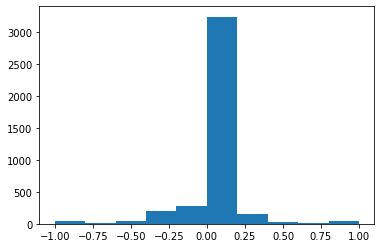

In [49]:
plt.hist(df['steering'])

In [50]:
# delete the values over specific threshhold (200 here)

m=[]
for j in range(num_bins):
  l=[]
  for i in range(len(df['steering'])):
    if df['steering'][i] >=bins[j] and df['steering'][i] < bins[j+1]:
      l.append(i)
  l = shuffle(l)
  l = l[400:]
  print(l)
  m.extend(l)
print(m)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2951, 2558, 3843, 2624, 109, 3716, 3468, 1465, 2540, 1996, 1392, 3028, 2025, 2024, 3490, 2062, 2801, 2843, 982, 3472, 1475, 421, 3065, 3358, 3342, 1460, 3877, 976, 1263, 1223, 1100, 416, 2647, 1447, 2520, 1267, 3644, 3339, 888, 505, 470, 1944, 3652, 2185, 335, 3549, 876, 3494, 1297, 524, 775, 1959, 1091, 2556, 853, 848, 3232, 1420, 3912, 1348, 3031, 3186, 3137, 2507, 3336, 358, 3404, 1633, 30, 2528, 2060, 1446, 2564, 1260, 796, 1967, 1396, 437, 475, 3037, 3328, 2789, 2636, 2651, 1979, 2289, 2752, 20, 638, 2244, 1456, 1160, 3426, 3330, 3968, 1233, 302, 275, 1754, 3562, 264, 706, 2816, 2684, 858, 4020, 3827, 3437, 2791, 279, 3279, 3470, 2510, 3429, 3355, 605, 3933, 2708, 3517, 2594, 2398, 130, 136, 1005, 91, 3046, 1920, 351, 1381, 94, 3583, 1140, 513, 2906, 3675, 1334, 2028, 1458, 353, 3633, 3611, 1552, 3892, 2806, 2844, 2722, 1120, 3091, 3861, 2670, 4035, 517, 3951, 465, 3460, 1424, 2934, 2243, 4006, 819, 1617, 2691, 3467, 2196, 1825, 1286, 1692, 394

In [51]:
len(m)

2590

In [52]:
df.index[m]

Int64Index([2951, 2558, 3843, 2624,  109, 3716, 3468, 1465, 2540, 1996,
            ...
            2344, 3090, 3448,  251,  430, 2084,  550, 3982,  874, 4012],
           dtype='int64', length=2590)

In [53]:
df.drop(df.index[m], inplace=True)
len(df)

1463

(array([ 46.,  20.,  42., 196., 260., 666., 147.,  30.,  14.,  42.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

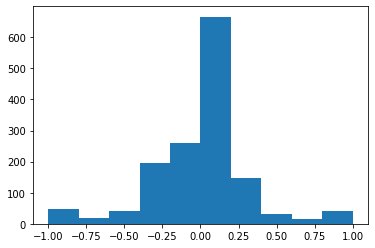

In [54]:
plt.hist(df['steering'].values)

In [55]:
df['steering'].values

array([ 0.  , -0.05, -0.25, ...,  0.  ,  0.  ,  0.  ])

In [56]:
df.iloc[0]

center      center_2018_07_16_17_11_43_860.jpg
left          left_2018_07_16_17_11_43_860.jpg
right        right_2018_07_16_17_11_43_860.jpg
steering                                   0.0
throttle                                   0.0
reverse                                    0.0
speed                                 0.615438
Name: 4, dtype: object

In [57]:
def loaad_img_steering(datadir, data):
  img_path=[]
  steerings=[]
  for i in range(len(data)):
    df1=data.iloc[i]
    center,left,right = df1[0], df1[1], df1[2]
    steering = df1[3]
    img_path.append(os.path.join(datadir,center.strip()))
    steerings.append(steering)
  img_path=np.asarray(img_path)
  steerings=np.asarray(steerings)
  return img_path, steerings

In [58]:
img_path, steering = loaad_img_steering('track/IMG', df)

In [59]:
img_path

array(['track/IMG/center_2018_07_16_17_11_43_860.jpg',
       'track/IMG/center_2018_07_16_17_11_44_413.jpg',
       'track/IMG/center_2018_07_16_17_11_44_485.jpg', ...,
       'track/IMG/center_2018_07_16_17_16_31_189.jpg',
       'track/IMG/center_2018_07_16_17_16_31_617.jpg',
       'track/IMG/center_2018_07_16_17_16_32_161.jpg'], dtype='<U44')

In [60]:
steering

array([ 0.  , -0.05, -0.25, ...,  0.  ,  0.  ,  0.  ])

In [61]:
x_train,x_test,y_train,y_test = train_test_split(img_path,steering, test_size=0.2, random_state=42)

In [62]:
len(x_train), len(x_test), len(y_train), len(y_test)

(1170, 293, 1170, 293)

(array([ 6.,  0.,  1.,  0.,  7.,  1.,  3.,  5., 13., 25., 20., 30., 79.,
        29., 13., 32., 11.,  6.,  2.,  0.,  1.,  1.,  1.,  1.,  6.]),
 array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
        -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
         0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ]),
 <a list of 25 Patch objects>)

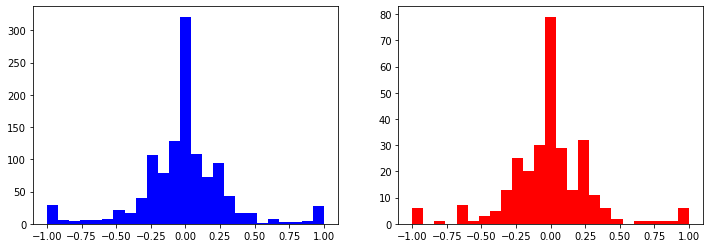

In [63]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].hist(y_train, bins=25, color='blue')
axs[1].hist(y_test, bins=25, color='red')

# Augmentation 

In [64]:
!pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from imgaug import augmenters as iaa

In [66]:
def zoom(img):
  zoom = iaa.Affine(scale=(1,1.3))
  img = zoom.augment_image(img)
  return img

Text(0.5, 1.0, 'zoomed image')

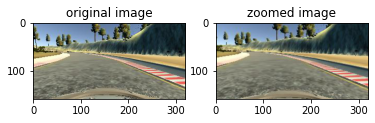

In [67]:
image = img_path[10]
original_img = plt.imread(image)
zoomed_img = zoom(original_img)

fig, axs = plt.subplots(1,2)
axs[0].imshow(original_img)
axs[0].set_title('original image')
axs[1].imshow(zoomed_img)
axs[1].set_title('zoomed image')

In [68]:
def pan(img):
  pan = iaa.Affine(translate_percent={'x':(-0.1,0.1), 'y':(-0.1,0.1)})
  img = pan.augment_image(img)
  return img

Text(0.5, 1.0, 'paned image')

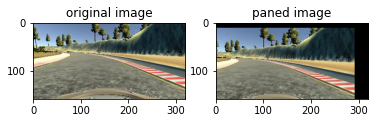

In [69]:
image = img_path[10]
original_img = plt.imread(image)
paned_img = pan(original_img)

fig, axs = plt.subplots(1,2)
axs[0].imshow(original_img)
axs[0].set_title('original image')
axs[1].imshow(paned_img)
axs[1].set_title('paned image')

In [70]:
def random_brigtness(img):
  bright = iaa.Multiply((0.2,1.2))
  return bright.augment_image(img)

Text(0.5, 1.0, 'bright image')

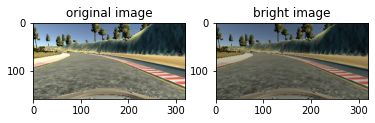

In [71]:
image = img_path[10]
original_img = plt.imread(image)
bright_img = random_brigtness(original_img)

fig, axs = plt.subplots(1,2)
axs[0].imshow(original_img)
axs[0].set_title('original image')
axs[1].imshow(bright_img)
axs[1].set_title('bright image')

In [72]:
def flip(img, steering):
  img = cv2.flip(img, 1)
  steering = -1*steering
  return img, steering

Text(0.5, 1.0, 'flip image')

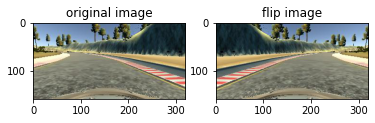

In [73]:
image = img_path[10]
steer = steering[10]
original_img = plt.imread(image)
flip_img = flip(original_img, steer)[0]

fig, axs = plt.subplots(1,2)
axs[0].imshow(original_img)
axs[0].set_title('original image')
axs[1].imshow(flip_img)
axs[1].set_title('flip image')

In [74]:
def random_aug(img, steering):
  img = plt.imread(img)
  if np.random.rand() < 0.5:
    img = zoom(img)
  if np.random.rand() < 0.5:
    img = pan(img)
  if np.random.rand() < 0.5:
    img = random_brigtness(img)
  if np.random.rand() < 0.5:
    img,steering = flip(img, steering)
  return img, steering

In [75]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize = (15,50))

for i in range(10):
  r = np.random.randint(0, len(img_path)-1)
  random_img = img_path[r]
  random_steer = steering[r]
  original_img = plt.imread(random_img)
  aug_img, steer = random_aug(random_img, random_steer)

  axs[i][0].imshow(original_img)
  axs[i][0].set_title('original image')
  axs[i][1].imshow(aug_img)
  axs[i][1].set_title('augmented image')

Output hidden; open in https://colab.research.google.com to view.

In [76]:
def preprocess(img):
  #img=plt.imread(img)
  img=img[60:140, :, :]
  img=cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200,66))
  img = img/255.0
  return img

Text(0.5, 1.0, 'preprocessed')

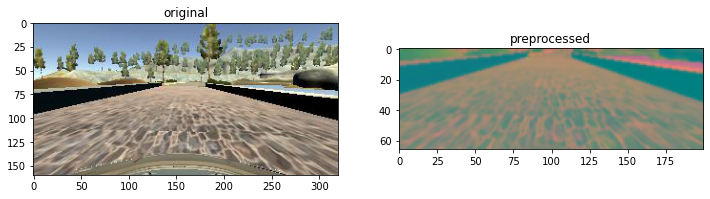

In [77]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].imshow(plt.imread(x_train[0]))
axs[0].set_title('original')
axs[1].imshow(preprocess(plt.imread(x_train[0])))
axs[1].set_title('preprocessed')

In [78]:
#x_train = np.array(list(map(preprocess, x_train)))
#x_test = np.array(list(map(preprocess, x_test)))

In [79]:
def batch_generator(img_paths, steering_angs, batch_size, isTraining):
  while True:
    batch_img = []
    batch_steering = []
    for i in range(batch_size):
      random_idx = np.random.randint(0, len(img_paths)-1)
      if isTraining:
       img, steering = random_aug(img_paths[random_idx], steering_angs[random_idx])
      else:
        img = plt.imread(img_paths[random_idx])
        steering = steering_angs[random_idx]
      img = preprocess(img)

      batch_img.append(img)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'test image')

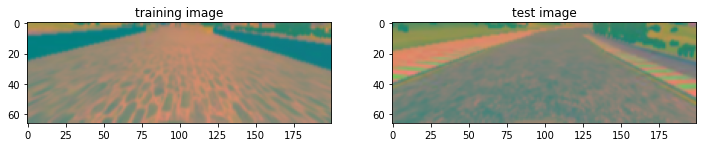

In [80]:
x_train_gen, y_train_gen = next(batch_generator(x_train,y_train, batch_size=1, isTraining=True))
x_test_gen, y_test_gen = next(batch_generator(x_test, y_test, batch_size=1, isTraining=False))

fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].imshow(x_train_gen[0])
axs[0].set_title('training image')
axs[1].imshow(x_test_gen[0])
axs[1].set_title('test image')

In [81]:
set(steering)

{-1.0,
 -0.9726921,
 -0.9500002,
 -0.9283149,
 -0.9108322,
 -0.8964942,
 -0.861778,
 -0.8608259,
 -0.8500001,
 -0.8377869,
 -0.8355195,
 -0.809979,
 -0.8000001,
 -0.7992551,
 -0.7500002,
 -0.7108321,
 -0.7031343,
 -0.7,
 -0.6880319,
 -0.6533071,
 -0.6500001,
 -0.6372107,
 -0.6312878,
 -0.6287026,
 -0.6281558,
 -0.6150856,
 -0.6110697,
 -0.6000001,
 -0.5835459,
 -0.570669,
 -0.5608321,
 -0.5500001,
 -0.5398225,
 -0.5365243,
 -0.5354305,
 -0.5000001,
 -0.493256,
 -0.4710048,
 -0.469167,
 -0.4610696,
 -0.4590586,
 -0.4573151,
 -0.4563951,
 -0.45,
 -0.4460752,
 -0.4441746,
 -0.4319619,
 -0.4176539,
 -0.407143,
 -0.4034554,
 -0.4010563,
 -0.4,
 -0.3987471,
 -0.397982,
 -0.3969882,
 -0.3966433,
 -0.3888051,
 -0.3825336,
 -0.37741,
 -0.3744849,
 -0.3742335,
 -0.371641,
 -0.369546,
 -0.3608321,
 -0.3599724,
 -0.35,
 -0.3495023,
 -0.3426753,
 -0.3423059,
 -0.3347006,
 -0.3342448,
 -0.3303984,
 -0.3276419,
 -0.3242413,
 -0.3200723,
 -0.3154351,
 -0.3090586,
 -0.3073593,
 -0.3069344,
 -0.3062583,

In [82]:
print(x_train.shape)

(1170,)


In [83]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu'))
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  #model.add(Dropout(0.5))
 
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  #model.add(Dropout(0.5))
 
  model.add(Dense(50, activation='elu'))
  #model.add(Dropout(0.5))
  model.add(Dense(10, activation ='elu'))
  #model.add(Dropout(0.5))
  model.add(Dense(1))
 
  optimizer= Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model


In [84]:
model = nvidia_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [85]:
hist = model.fit_generator(batch_generator(x_train,y_train,100,True), steps_per_epoch=300, epochs=10, 
                           validation_data=batch_generator(x_test,y_test,100,False), validation_steps=200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
300/300 [==============================] - 1027s 3s/step - loss: 0.1133 - val_loss: 0.0619
Epoch 2/10
300/300 [==============================] - 209s 699ms/step - loss: 0.0582 - val_loss: 0.0559
Epoch 3/10
300/300 [==============================] - 207s 692ms/step - loss: 0.0516 - val_loss: 0.0410
Epoch 4/10
300/300 [==============================] - 207s 693ms/step - loss: 0.0427 - val_loss: 0.0367
Epoch 5/10
300/300 [==============================] - 207s 691ms/step - loss: 0.0398 - val_loss: 0.0323
Epoch 6/10
300/300 [==============================] - 208s 694ms/step - loss: 0.0357 - val_loss: 0.0410
Epoch 7/10
300/300 [==============================] - 206s 690ms/step - loss: 0.0344 - val_loss: 0.0351
Epoch 8/10
300/300 [==============================] - 206s 690ms/step - loss: 0.0313 - val_loss: 0.0328
Epoch 9/10
300/300 [==============================] - 208s 696ms/step - loss: 0.0299 - val_loss: 0.0284
Epoch 10/10
300/300 [==============================] - 207s 692ms/

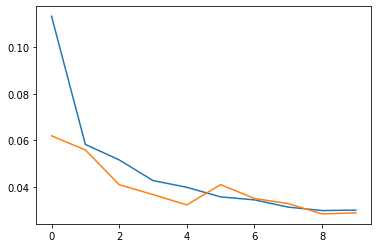

In [90]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [92]:
model.save('drive.h5')